In [21]:
import numpy as np
import pandas as pd
import math
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [186]:
def OSPL(dfq):
    dff = dfq.copy()
    dff['10'] = 10**(dff['dB']/10)
    return 10*math.log10(dff['10'].sum())

Above function defines this formula
$$\text{Overall SPL} =10\text{log}_{10}\left(\sum_{i=1}^{n}10^{SPL_i/10}\right)$$
where $n$ is number of frequency bands

### 1. Narrowband 

In [112]:
df = pd.read_csv('Narrowband.csv')

In [113]:
df

,Freq,dB
0,15.000015,69.142136
1,30.000031,55.050041
2,45.000046,57.072304
3,60.000061,54.560333
4,75.000076,52.880436
...,...,...
2095,31440.031000,55.324638
2096,31455.031000,57.801537
2097,31470.031000,56.781101
2098,31485.031000,57.393974


In [188]:
fnb = OSPL(df)
fnb

85.84282220856807

### 2. $1/3^\text{rd}$ Octave Bands

In [195]:
df13 = pd.read_csv('13 Octave.csv')

In [196]:
df13

,LHS,1/3 OB Freq,RHS,dB
0,70.8,80,89.1,64.641350
1,89.1,100,112.0,65.900085
2,112.0,125,141.0,62.265274
3,141.0,160,178.0,60.126492
4,178.0,200,224.0,62.217052
5,224.0,250,282.0,61.348511
6,282.0,315,355.0,58.774681
7,355.0,400,447.0,58.041996
8,447.0,500,562.0,57.927223
9,562.0,630,708.0,56.362488


In [197]:
f13 = OSPL(df13)
f13

97.49698855469269

In [198]:
def add_for_plot(dfq):
    '''Adds additional dummy line for plotting step function'''
    dfa = dfq.copy()
    final_mf = dfa['1/3 OB Freq'].iloc[-1]
    dfa.loc[len(dfa)] = {'LHS':final_mf, 'dB':dfa['dB'].iloc[-1]}
    return dfa

df13 = add_for_plot(df13)
df13

,LHS,1/3 OB Freq,RHS,dB
0,70.8,80.0,89.1,64.641350
1,89.1,100.0,112.0,65.900085
2,112.0,125.0,141.0,62.265274
3,141.0,160.0,178.0,60.126492
4,178.0,200.0,224.0,62.217052
5,224.0,250.0,282.0,61.348511
6,282.0,315.0,355.0,58.774681
7,355.0,400.0,447.0,58.041996
8,447.0,500.0,562.0,57.927223
9,562.0,630.0,708.0,56.362488


Octave band frequency range data from [here](https://www.engineeringtoolbox.com/octave-bands-frequency-limits-d_1602.html)

### 3. $1/3^{\text{rd}}$ Octave Bands A-weighted

In [203]:
dfa13 = pd.read_csv('13 Octave dBA.csv')
dfa13

,LHS,1/3 OB Freq,RHS,dB
0,70.8,80,89.1,42.141350
1,89.1,100,112.0,46.800083
2,112.0,125,141.0,46.165272
3,141.0,160,178.0,46.726490
4,178.0,200,224.0,51.317055
5,224.0,250,282.0,52.748512
6,282.0,315,355.0,52.174683
7,355.0,400,447.0,53.241997
8,447.0,500,562.0,54.727222
9,562.0,630,708.0,54.462486


In [204]:
fa13 = OSPL(dfa13)
fa13

89.33543094561357

In [205]:
dfa13 = add_for_plot(dfa13)

### Plot results

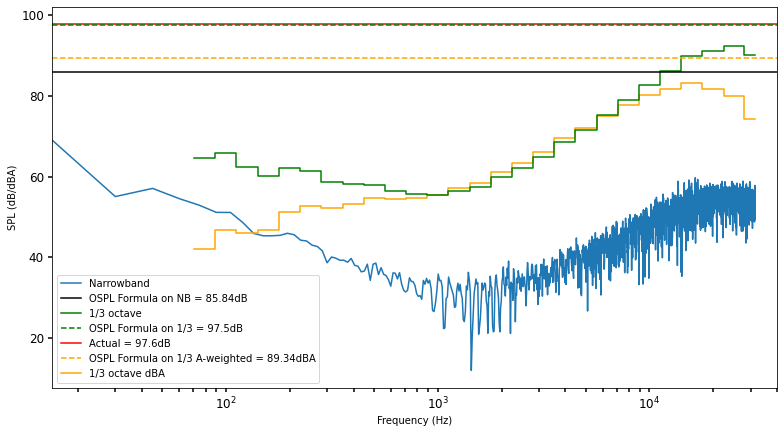

In [217]:
f_act = 97.6037
plt.figure(figsize = (13,7))
plt.plot(df['Freq'], df['dB'], label = 'Narrowband')
plt.step(dfa13['LHS'], dfa13['dB'], label='1/3 octave dBA', where='post', color = 'orange')
plt.step(df13['LHS'], df13['dB'], label='1/3 octave', where='post', color = 'g')
plt.xlabel('Frequency (Hz)')
plt.ylabel('SPL (dB/dBA)')
plt.axhline(f_act, color = 'r', label = f'Actual = {round(f_act,2)}dB')
plt.axhline(fnb, color = 'black', label = f'OSPL Formula on NB = {round(fnb,2)}dB')
plt.axhline(f13, color = 'g',  linestyle = '--', label = f'OSPL Formula on 1/3 = {round(f13,2)}dB')
plt.axhline(dBA, color = 'orange', linestyle = '--', label = f'OSPL Formula on 1/3 A-weighted = {round(fa13,2)}dBA')
plt.xscale('log')
plt.xlim(15, 40000)
plt.tick_params(axis='both', which='both', labelsize=12, length=4, width=1.5)
handles, labels = plt.gca().get_legend_handles_labels()
order = [0, 4, 2, 5, 3, 6, 1]  # Change the order as needed
plt.legend([handles[idx] for idx in order], [labels[idx] for idx in order])
plt.show()

- Remember the dBA curve. Difference between dB and dBA 1/3rd octaves match with it - notice the intersection at ~1kHz where weightage becomes zero
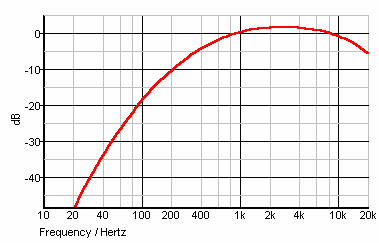
- Still don't understand how Narrowband SPL is converted to 1/3 Octave bands'. Not mean ofc, neither the OSPL formula.
- Using OSPL formula on Narrowband provides a result < same on 1/3 Octave. Furthermore, the latter seems much closer to the actual value. Hence I'll conclude the OSPL formula is, by standard, based off of the 1/3rd Octave band SPLs.